In [1]:

import warnings                    
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd                
import numpy as np                  
import matplotlib.pyplot as plt    
%matplotlib inline                 
import seaborn as sns     

# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle
import pandas_profiling as pp

In [165]:
data = pd.read_csv('energy_dataset.csv')
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
df = data.copy()

In [4]:
df.shape

(35064, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [6]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [7]:
df['time'].nunique()

35064

In [8]:
df.drop('time',axis=1, inplace=True)
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [9]:
df['generation fossil oil shale'].nunique()

1

In [10]:
df['generation fossil peat'].nunique()

1

In [11]:
df['generation geothermal'].nunique()

1

In [12]:
df['generation marine'].nunique()

1

In [13]:
df['generation wind offshore'].nunique()

1

### Above mentioned features have only 1 unique value which is 0. Hence we can drop these features

In [14]:
df.drop(['generation wind offshore', 'generation marine', 'generation geothermal','generation fossil peat',  'generation fossil oil shale', 'generation fossil coal-derived gas'], axis=1, inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending=False)

forecast wind offshore eday ahead              35064
generation hydro pumped storage aggregated     35064
total load actual                                 36
generation biomass                                19
generation fossil oil                             19
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation waste                                  19
generation fossil brown coal/lignite              18
generation wind onshore                           18
generation solar                                  18
generation other renewable                        18
generation other                                  18
generation hydro water reservoir                  18
generation fossil hard coal                       18
generation fossil gas                             18
generation nuclear                                17
forecast solar day ahead                           0
forecast wind onshore day ahead               

In [16]:
# dropping these features as it contains all null values
df.drop(['forecast wind offshore eday ahead', 'generation hydro pumped storage aggregated'], axis=1, inplace=True)
df.head(1)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41


In [17]:
#sns.relplot(data=df, x="generation wind onshore", y="price actual", kind="line")

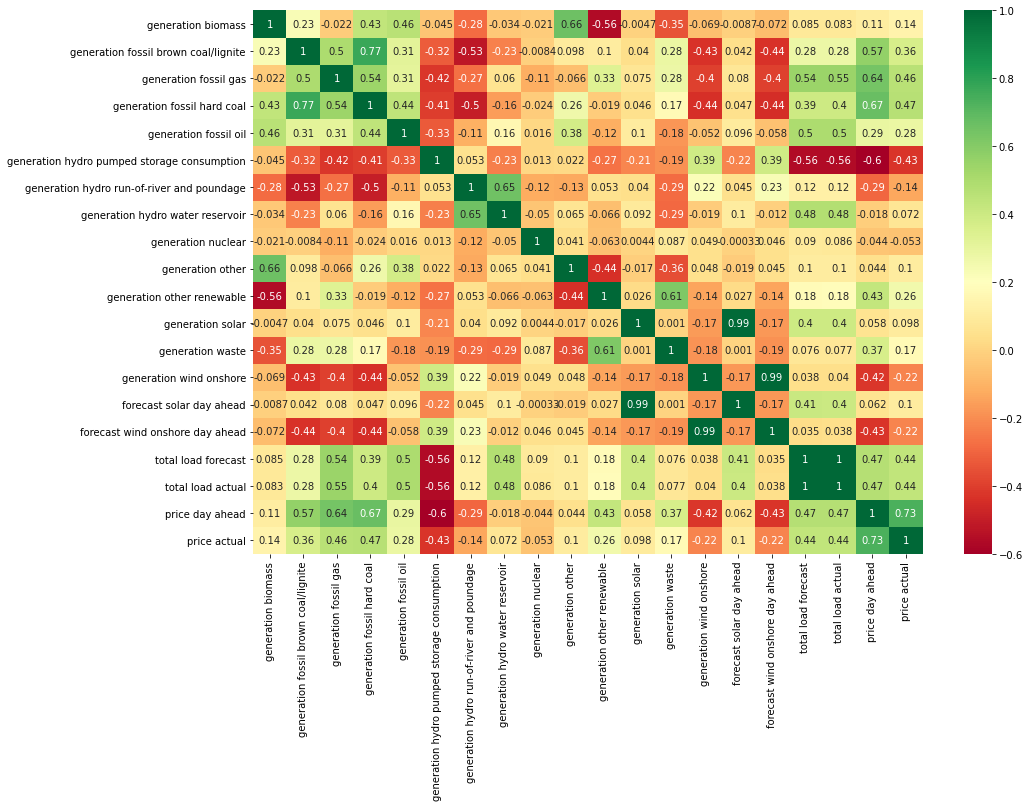

In [18]:
# Greener the block, Higher will be the Correlation
corr = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

# Exploratory Data Analysis

<AxesSubplot:xlabel='generation fossil brown coal/lignite', ylabel='price actual'>

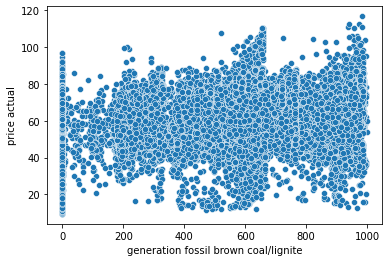

In [19]:
sns.scatterplot(x = df['generation fossil brown coal/lignite'], y = df['price actual'])

In [20]:
df['generation fossil brown coal/lignite'].value_counts()

0.0      10517
663.0      165
664.0      124
595.0      108
657.0      103
         ...  
144.0        1
39.0         1
87.0         1
41.0         1
35.0         1
Name: generation fossil brown coal/lignite, Length: 956, dtype: int64

### Generation fossil brown coal/lignite has max 0 value i.e there is no fossil brown coal/lignite generation 

<AxesSubplot:xlabel='generation fossil gas', ylabel='price actual'>

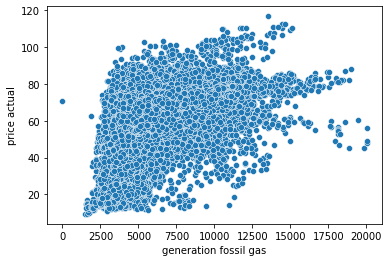

In [21]:
sns.scatterplot(x = df['generation fossil gas'], y = df['price actual'])

<AxesSubplot:xlabel='generation fossil hard coal', ylabel='price actual'>

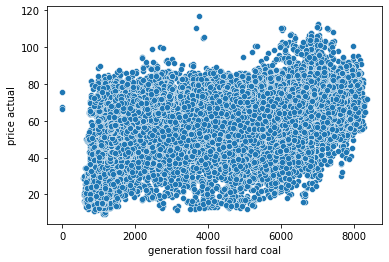

In [22]:
sns.scatterplot(x = df['generation fossil hard coal'], y = df['price actual'])

<AxesSubplot:xlabel='price day ahead', ylabel='price actual'>

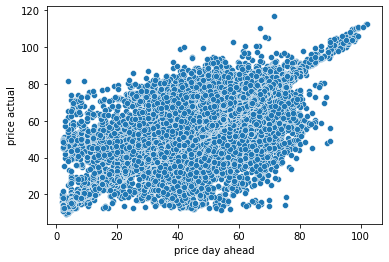

In [23]:
sns.scatterplot(x = df['price day ahead'], y = df['price actual'])

In [24]:
df['generation hydro pumped storage consumption'].value_counts()

0.0       12607
1.0        1641
2.0         300
3.0         184
54.0        130
          ...  
2743.0        1
2505.0        1
3068.0        1
1913.0        1
2217.0        1
Name: generation hydro pumped storage consumption, Length: 3311, dtype: int64

### 33 % of values for 'generation hydro pumped storage consumption' contain zero.

# Train- Test Split

In [25]:
X = df.drop(['price day ahead'], axis=1)
X.head(3)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,64.92
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,64.48


In [26]:
X.shape

(35064, 19)

In [27]:
y = df['price day ahead']
y.head(2)

0    50.1
1    48.1
Name: price day ahead, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

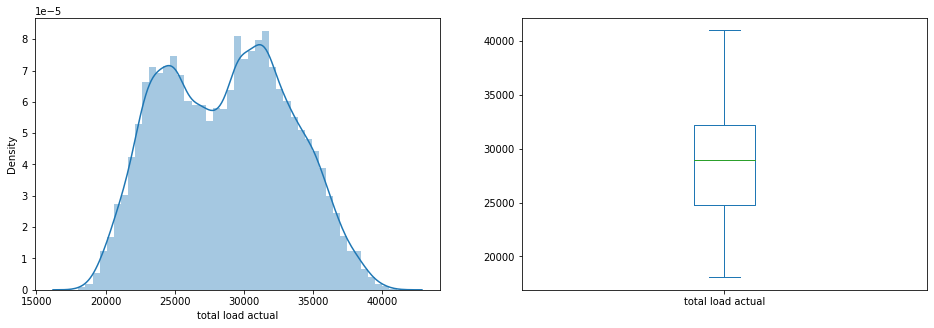

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['total load actual'])

plt.subplot(122)
X_train['total load actual'].plot.box(figsize=(16,5))
plt.show()

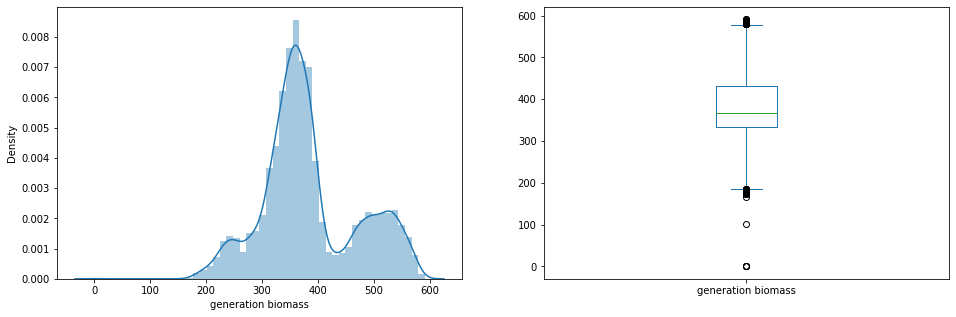

In [30]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation biomass'])

plt.subplot(122)
X_train['generation biomass'].plot.box(figsize=(16,5))
plt.show()

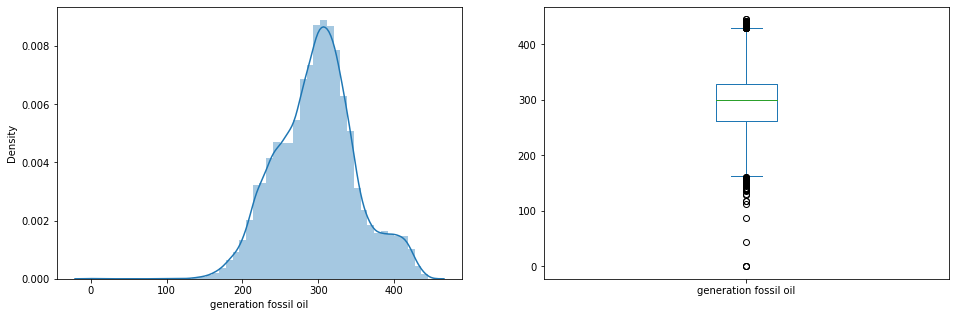

In [31]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation fossil oil'])

plt.subplot(122)
X_train['generation fossil oil'].plot.box(figsize=(16,5))
plt.show()

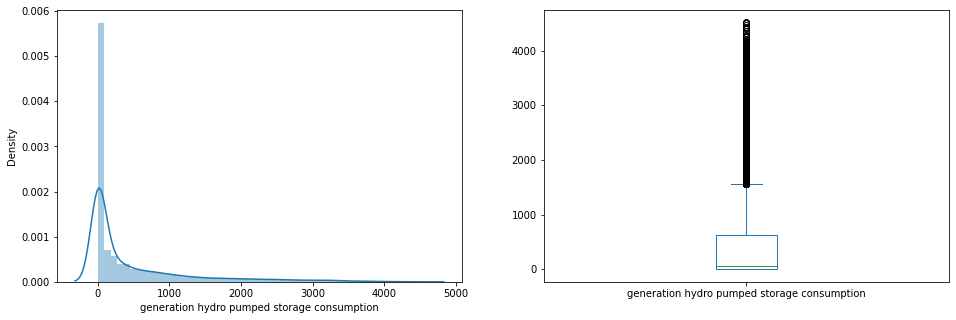

In [32]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation hydro pumped storage consumption'])

plt.subplot(122)
X_train['generation hydro pumped storage consumption'].plot.box(figsize=(16,5))
plt.show()

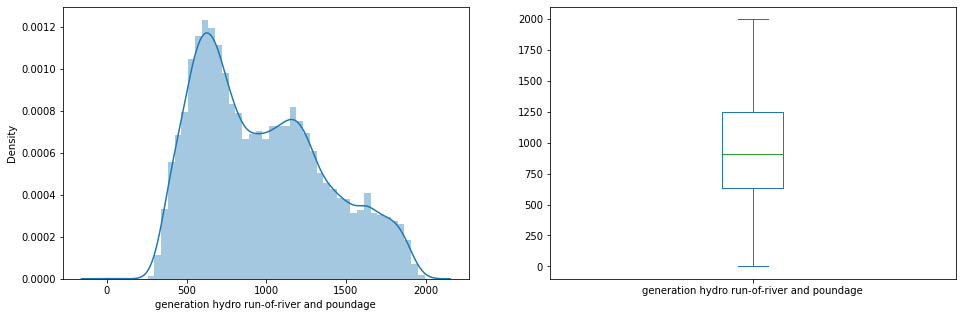

In [33]:

plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation hydro run-of-river and poundage'])

plt.subplot(122)
X_train['generation hydro run-of-river and poundage'].plot.box(figsize=(16,5))
plt.show()

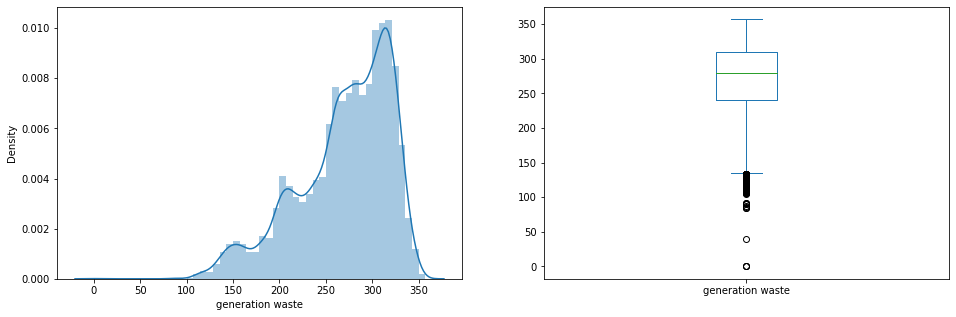

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation waste'])

plt.subplot(122)
X_train['generation waste'].plot.box(figsize=(16,5))
plt.show()

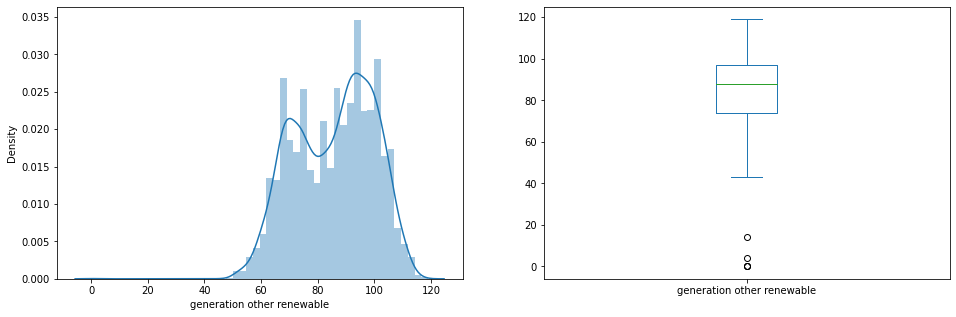

In [35]:

plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation other renewable'])

plt.subplot(122)
X_train['generation other renewable'].plot.box(figsize=(16,5))
plt.show()

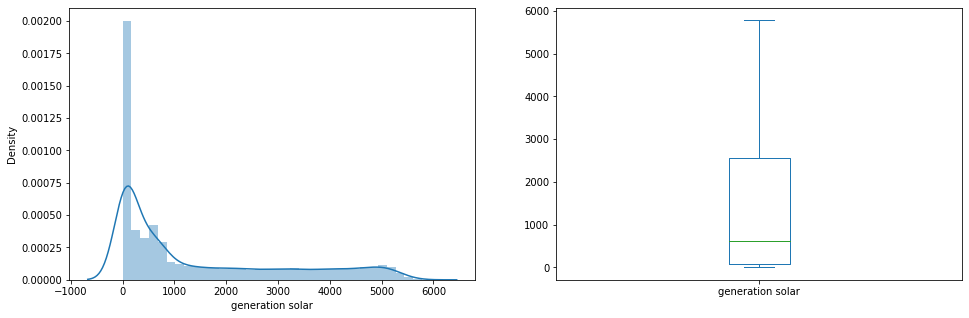

In [36]:

plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation solar'])

plt.subplot(122)
X_train['generation solar'].plot.box(figsize=(16,5))
plt.show()

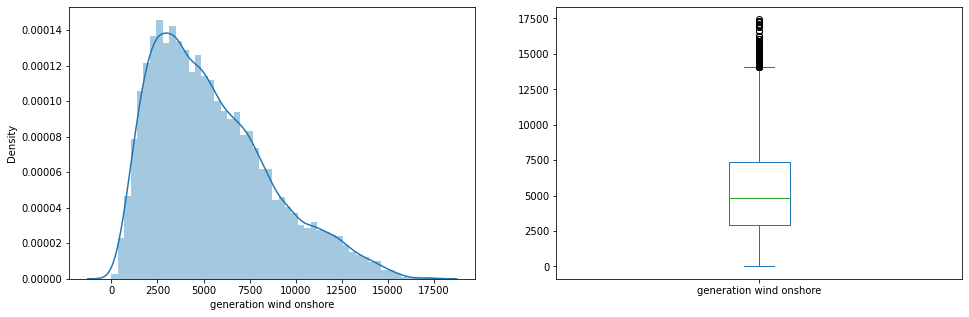

In [37]:

plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation wind onshore'])

plt.subplot(122)
X_train['generation wind onshore'].plot.box(figsize=(16,5))
plt.show()

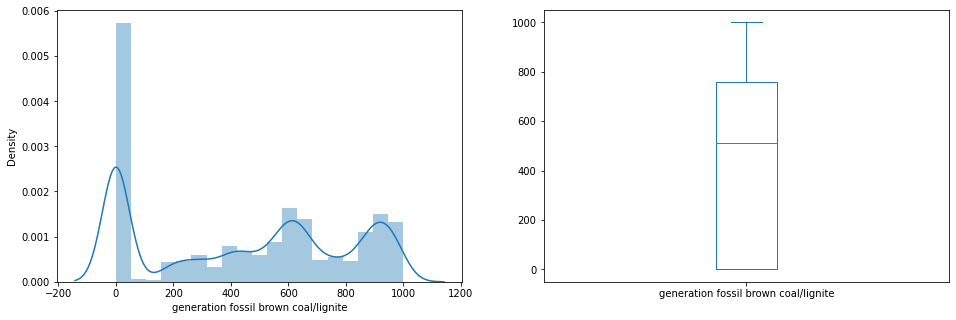

In [38]:

plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation fossil brown coal/lignite'])

plt.subplot(122)
X_train['generation fossil brown coal/lignite'].plot.box(figsize=(16,5))
plt.show()

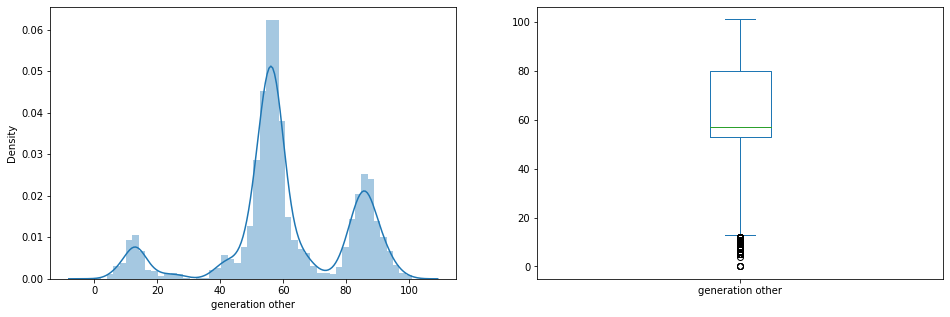

In [39]:

plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation other'])

plt.subplot(122)
X_train['generation other'].plot.box(figsize=(16,5))
plt.show()

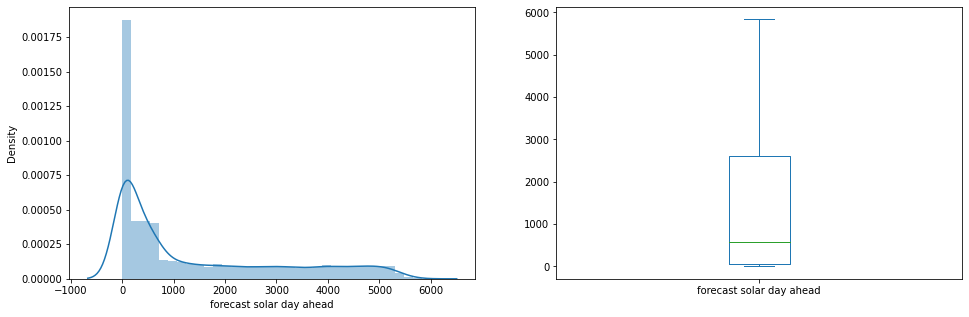

In [40]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['forecast solar day ahead'])

plt.subplot(122)
X_train['forecast solar day ahead'].plot.box(figsize=(16,5))
plt.show()

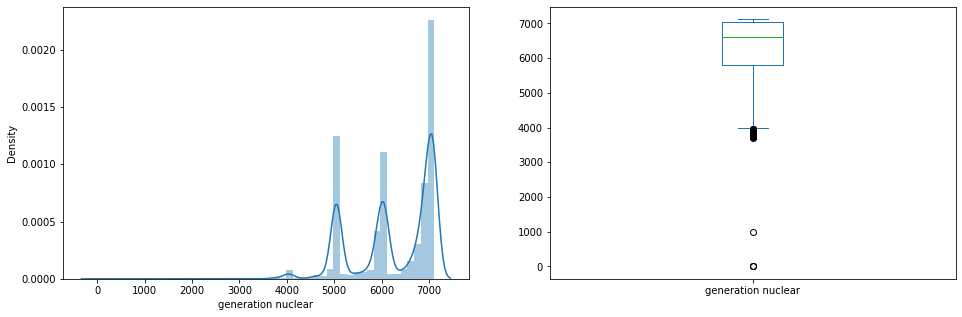

In [41]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation nuclear'])

plt.subplot(122)
X_train['generation nuclear'].plot.box(figsize=(16,5))
plt.show()

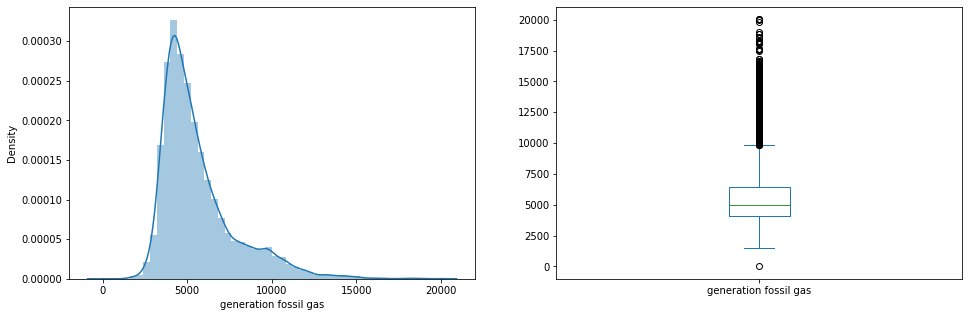

In [42]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation fossil gas'])

plt.subplot(122)
X_train['generation fossil gas'].plot.box(figsize=(16,5))
plt.show()

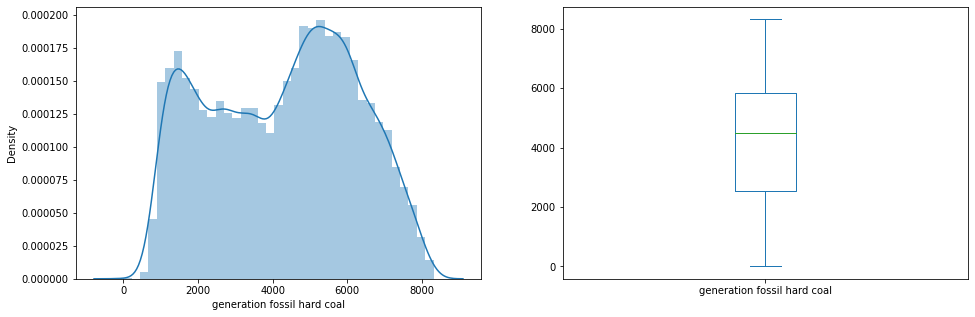

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation fossil hard coal'])

plt.subplot(122)
X_train['generation fossil hard coal'].plot.box(figsize=(16,5))
plt.show()

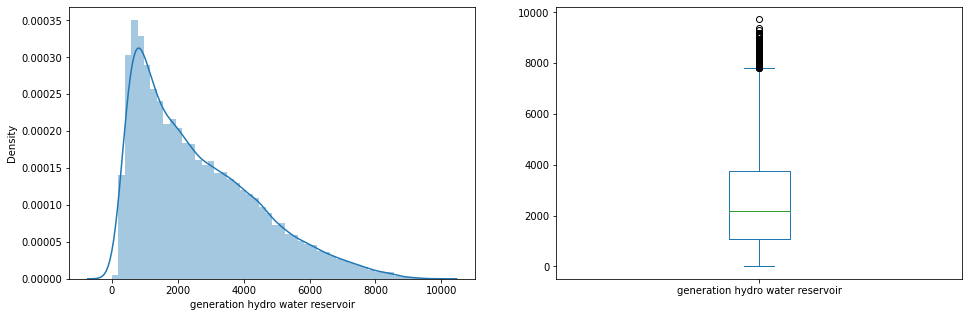

In [44]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation hydro water reservoir'])

plt.subplot(122)
X_train['generation hydro water reservoir'].plot.box(figsize=(16,5))
plt.show()

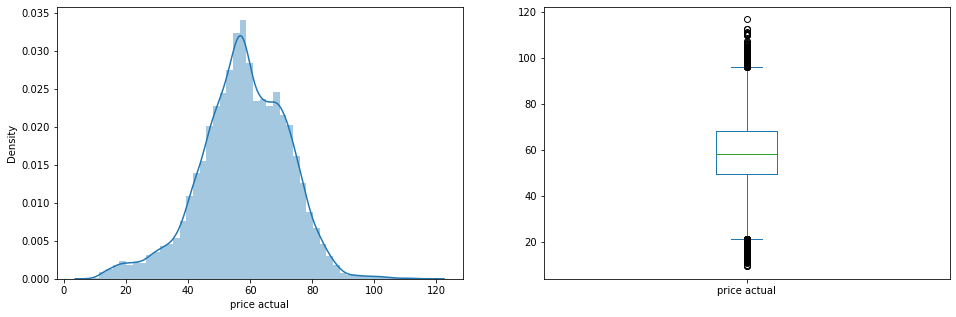

In [45]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['price actual'])

plt.subplot(122)
X_train['price actual'].plot.box(figsize=(16,5))
plt.show()

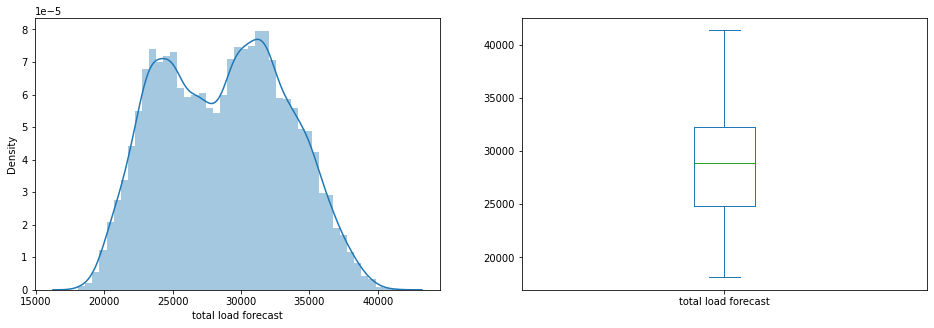

In [46]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['total load forecast'])

plt.subplot(122)
X_train['total load forecast'].plot.box(figsize=(16,5))
plt.show()

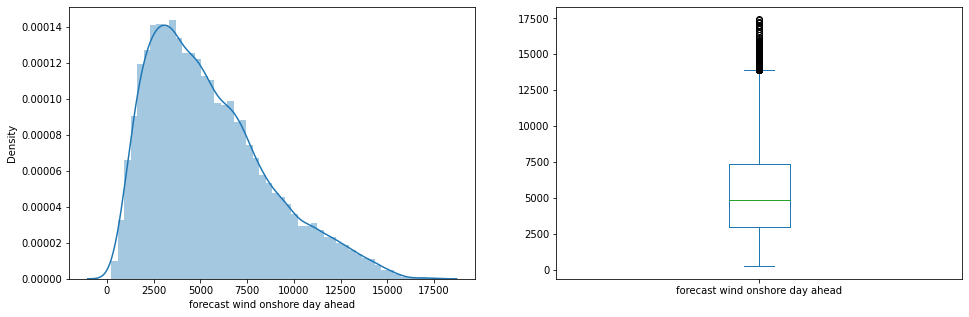

In [47]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['forecast wind onshore day ahead'])

plt.subplot(122)
X_train['forecast wind onshore day ahead'].plot.box(figsize=(16,5))
plt.show()

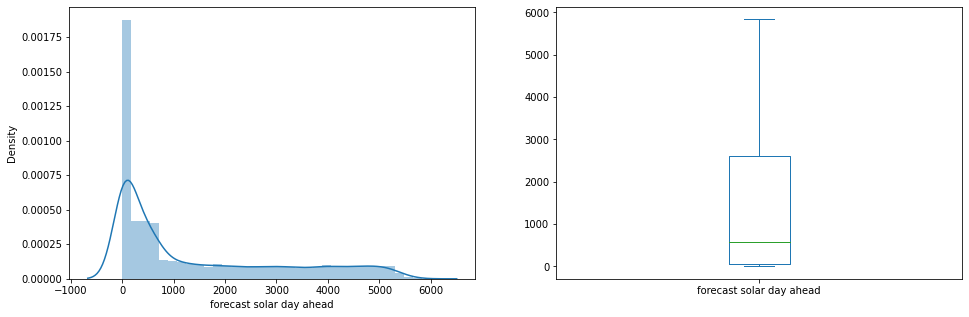

In [48]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['forecast solar day ahead'])

plt.subplot(122)
X_train['forecast solar day ahead'].plot.box(figsize=(16,5))
plt.show()

In [49]:
from sklearn.base import TransformerMixin
import pandas as pd
pd.options.mode.chained_assignment = None  # To ignore the warning for not returning a copied DataFrame

class HandleOutliers(TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        from scipy.stats import shapiro

        for col in X.columns : # Looping through all columns within the given DataFrame
            
            # If p-value < 0.05 == Skewed Distribution, else Normal Distribution
            
            if shapiro(X[col]).pvalue < 0.05 :

                # IQR method to handle outliers with Skewed Distribution
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)

                iqr = q3 - q1

                lower_boundary = q1 - 1.5 * q1
                upper_boundary = q3 + 1.5 * q3

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary

                
            else :

                # 3-Sigma method to handle outliers with Normal Distribution
                lower_boundary = X[col].mean() - 3 * X[col].std()
                upper_boundary = X[col].mean() + 3 * X[col].std()

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary
                
        return X

In [50]:

outliers = HandleOutliers()

In [51]:
null_features = ['generation biomass',
'generation fossil oil',
'generation hydro pumped storage consumption',
'generation waste',
'generation other renewable',
'generation wind onshore',
'generation other',
'generation nuclear',
'generation fossil gas',
'generation hydro water reservoir',
'price actual',
'forecast wind onshore day ahead',
                'generation fossil brown coal/lignite',
            'generation fossil hard coal', 'generation hydro run-of-river and poundage', 'generation solar', 'total load actual'
                ]

In [52]:
y_train.head()

27887    61.45
9315     33.00
13459    41.99
34428    42.49
54       20.14
Name: price day ahead, dtype: float64

In [53]:
for i in null_features:
    mean_value=X_train[i].mean()
    X_train[i].fillna(value=mean_value, inplace=True)
for i in null_features:
    mean_value=X_test[i].mean()
    X_test[i].fillna(value=mean_value, inplace=True)
    




In [54]:
mean_value_train = y_train.mean()
y_train.fillna(value=mean_value_train, inplace=True)
mean_value_test = y_test.mean()
y_test.fillna(value=mean_value_test, inplace=True)

In [55]:
X_train.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price actual                                   0
dtype: int64

In [56]:
X_test.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price actual                                   0
dtype: int64

In [57]:
y_test.isnull().sum()

0

In [58]:
y_train.isnull().sum()

0

In [59]:
outliers_features = ['generation biomass',
'generation fossil oil',
'generation hydro pumped storage consumption',
'generation waste',
'generation other renewable',
'generation wind onshore',
'generation other',
'generation nuclear',
'generation fossil gas',
'generation hydro water reservoir',
'price actual',
'forecast wind onshore day ahead']

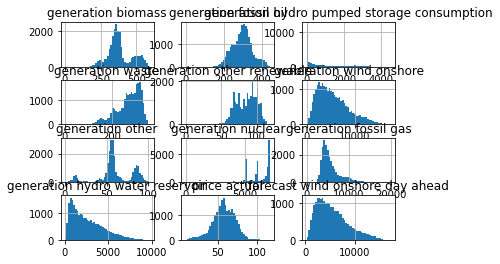

In [60]:
# X_train before handling the outliers
X_train[outliers_features].hist(bins=50)
plt.show()

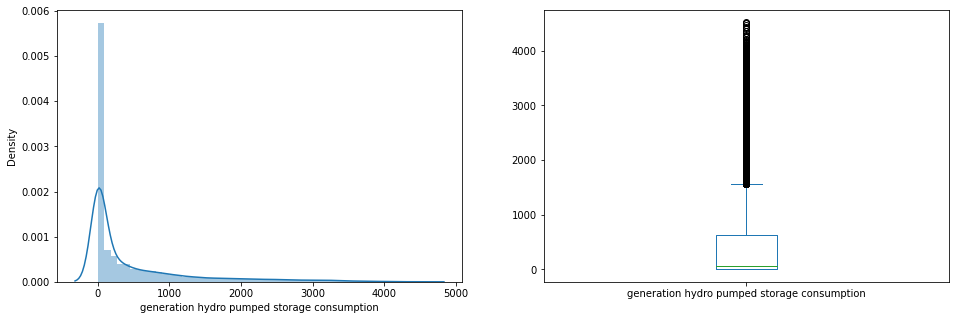

In [61]:
plt.figure(1)
plt.subplot(121)
sns.distplot(X_train['generation hydro pumped storage consumption'])

plt.subplot(122)
X_train['generation hydro pumped storage consumption'].plot.box(figsize=(16,5))
plt.show()

In [62]:
outliers_df = outliers.fit_transform(X_train[outliers_features])

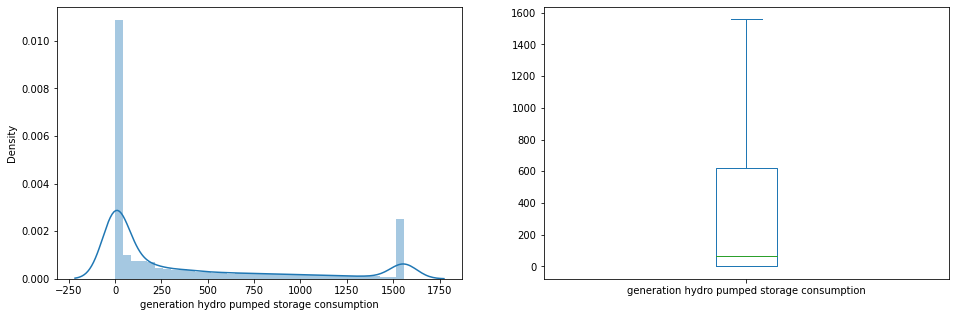

In [63]:
plt.figure(1)
plt.subplot(121)
sns.distplot(outliers_df['generation hydro pumped storage consumption'])

plt.subplot(122)
outliers_df['generation hydro pumped storage consumption'].plot.box(figsize=(16,5))
plt.show()

<Figure size 3600x1440 with 0 Axes>

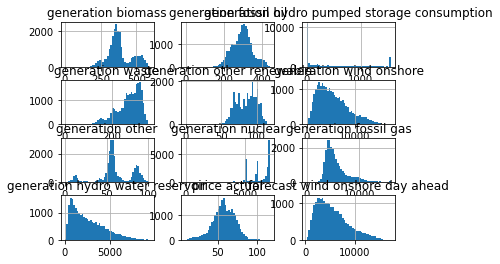

In [64]:
plt.figure(figsize=(50,20))
outliers_df.hist(bins=50)
plt.show()

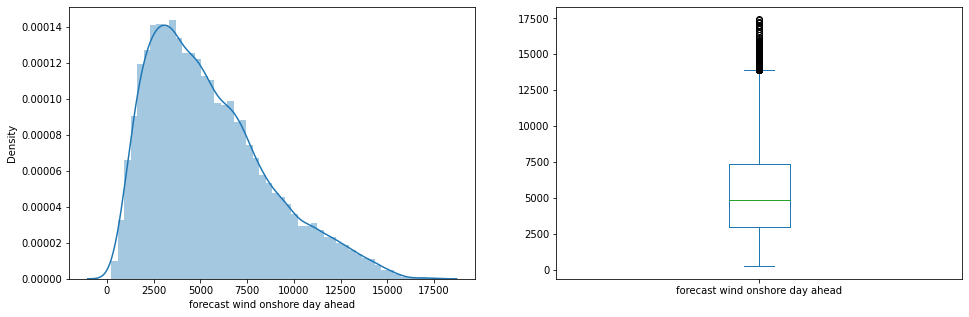

In [65]:
plt.figure(1)
plt.subplot(121)
sns.distplot(outliers_df['forecast wind onshore day ahead'])

plt.subplot(122)
outliers_df['forecast wind onshore day ahead'].plot.box(figsize=(16,5))
plt.show()

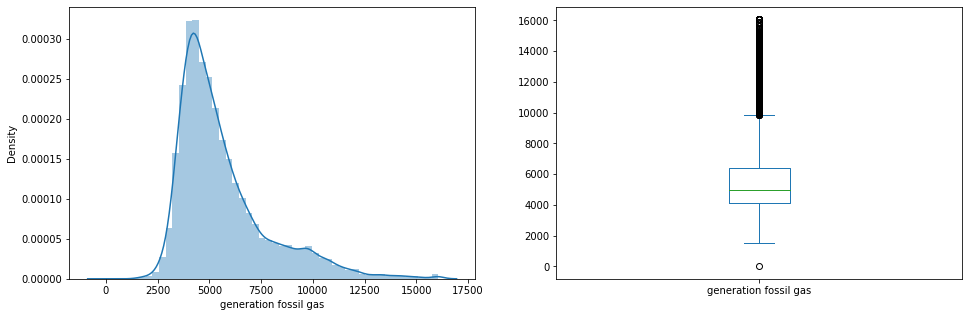

In [66]:
plt.figure(1)
plt.subplot(121)
sns.distplot(outliers_df['generation fossil gas'])

plt.subplot(122)
outliers_df['generation fossil gas'].plot.box(figsize=(16,5))
plt.show()

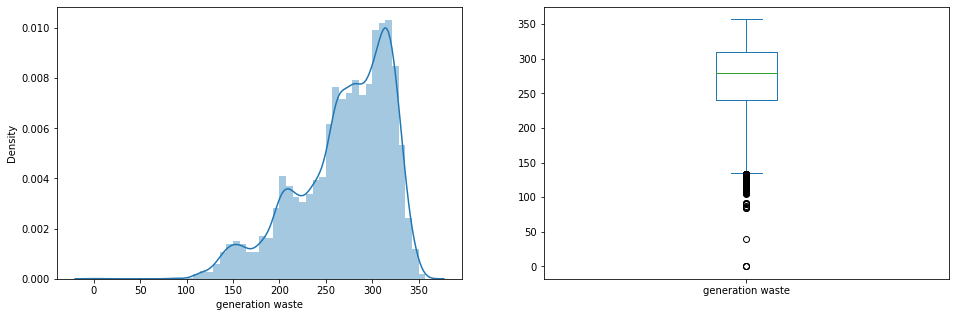

In [67]:
plt.figure(1)
plt.subplot(121)
sns.distplot(outliers_df['generation waste'])

plt.subplot(122)
outliers_df['generation waste'].plot.box(figsize=(16,5))
plt.show()

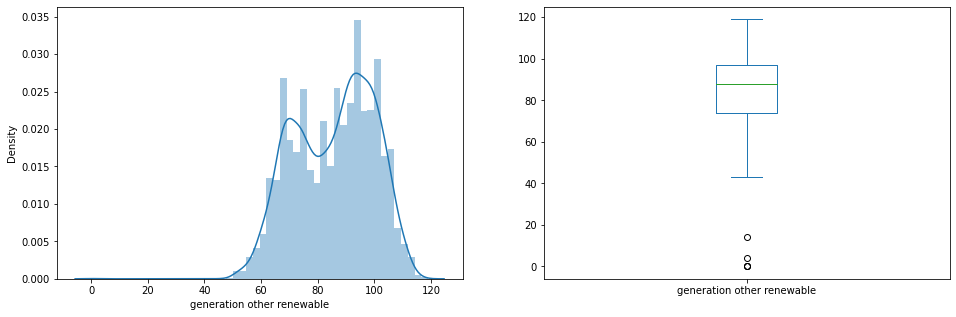

In [68]:
plt.figure(1)
plt.subplot(121)
sns.distplot(outliers_df['generation other renewable'])

plt.subplot(122)
outliers_df['generation other renewable'].plot.box(figsize=(16,5))
plt.show()

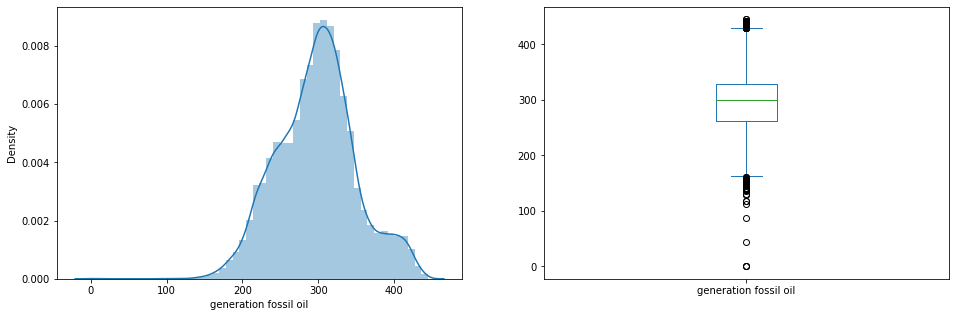

In [69]:
plt.figure(1)
plt.subplot(121)
sns.distplot(outliers_df['generation fossil oil'])

plt.subplot(122)
outliers_df['generation fossil oil'].plot.box(figsize=(16,5))
plt.show()

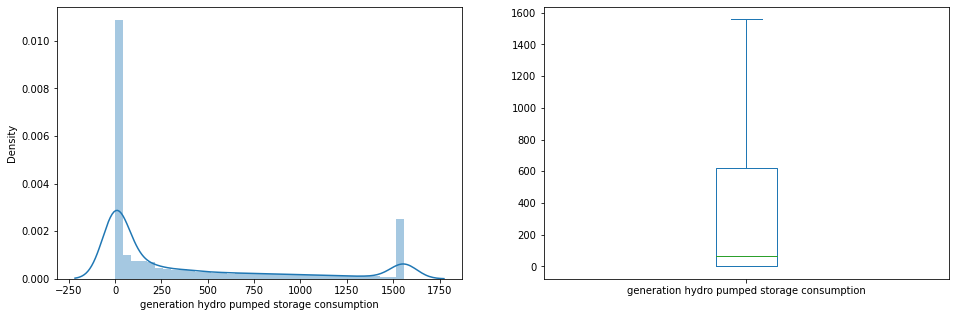

In [70]:
plt.figure(1)
plt.subplot(121)
sns.distplot(outliers_df['generation hydro pumped storage consumption'])

plt.subplot(122)
outliers_df['generation hydro pumped storage consumption'].plot.box(figsize=(16,5))
plt.show()

In [71]:
X_train.drop(outliers_features, axis=1, inplace=True)

In [72]:
X_train = pd.concat([X_train, outliers_df], axis=1)

In [73]:
X_train.head(3)


,generation fossil brown coal/lignite,generation fossil hard coal,generation hydro run-of-river and poundage,generation solar,forecast solar day ahead,total load forecast,total load actual,generation biomass,generation fossil oil,generation hydro pumped storage consumption,generation waste,generation other renewable,generation wind onshore,generation other,generation nuclear,generation fossil gas,generation hydro water reservoir,price actual,forecast wind onshore day ahead
27887,663.0,4672.0,1277.0,633.0,589.0,29199.0,29865.0,359.0,315.0,0.000,288.0,104.0,2432.0,54.0,6006.0,5749.0,4670.0,55.17,3500.0
9315,0.0,1883.0,1040.0,13.0,3.0,21405.0,21493.0,483.0,310.0,1558.125,245.0,71.0,3290.0,83.0,6098.0,4099.0,2621.0,43.05,3252.0
13459,0.0,3558.0,888.0,2272.0,2313.0,32347.0,32150.0,357.0,307.0,0.000,316.0,78.0,9425.0,55.0,7011.0,6023.0,1520.0,50.67,9346.0


Preprocessing test data seperately

In [74]:
# 1. Handling the outliers (Using transform method for Test data)
outliers_df = outliers.transform(X_test[outliers_features])

X_test.drop(outliers_features, axis=1, inplace=True)

X_test = pd.concat([X_test, outliers_df], axis=1)

In [75]:
X_test.head(2)

,generation fossil brown coal/lignite,generation fossil hard coal,generation hydro run-of-river and poundage,generation solar,forecast solar day ahead,total load forecast,total load actual,generation biomass,generation fossil oil,generation hydro pumped storage consumption,generation waste,generation other renewable,generation wind onshore,generation other,generation nuclear,generation fossil gas,generation hydro water reservoir,price actual,forecast wind onshore day ahead
6070,864.0,7071.0,580.0,53.0,96.0,25374.0,25744.0,569.0,324.0,389.0,263.0,73.0,1923.0,86.0,4954.0,5625.0,1656.0,65.66,1918.0
32600,740.0,5937.0,731.0,1282.0,1267.0,32568.0,32484.0,364.0,326.0,0.0,312.0,112.0,981.0,63.0,6993.0,7406.0,3657.0,81.89,1261.0


In [76]:
X_train.columns == X_test.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#Standardized training dataset
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual
0,0.605137,0.211513,0.763796,-0.473295,-0.503374,0.102646,0.251926,-0.285423,0.323280,-0.711579,0.370886,1.304663,-0.946701,-0.307880,-0.317133,0.053863,1.122618,-0.194400,-0.622701
1,-1.266995,-1.212091,0.172488,-0.843751,-0.853682,-1.592841,-1.578046,1.168964,0.227963,2.183470,-0.481898,-1.041601,-0.679027,1.127527,-0.207320,-0.695584,0.007773,-1.050170,-0.700972
2,-1.266995,-0.357112,-0.206747,0.506022,0.527225,0.787454,0.751386,-0.308880,0.170772,-0.711579,0.926187,-0.543909,1.234936,-0.258383,0.882453,0.178317,-0.591273,-0.512136,1.222363
3,-1.266995,-1.276406,1.492326,1.484145,2.000192,-0.116197,-0.061303,-1.423128,-0.343942,0.247167,-1.354514,1.091366,0.717994,-0.307880,-1.849738,-1.008080,-0.286037,1.069486,0.749893
4,-1.266995,-1.537239,0.609107,-0.815071,-0.854878,-1.513875,-1.538483,0.875741,-2.097782,2.183470,-1.632164,-1.254898,1.334143,0.830547,0.987491,-0.942220,0.007229,0.014600,1.344505


In [78]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23492 entries, 0 to 23491
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           23492 non-null  float64
 1   generation fossil brown coal/lignite         23492 non-null  float64
 2   generation fossil gas                        23492 non-null  float64
 3   generation fossil hard coal                  23492 non-null  float64
 4   generation fossil oil                        23492 non-null  float64
 5   generation hydro pumped storage consumption  23492 non-null  float64
 6   generation hydro run-of-river and poundage   23492 non-null  float64
 7   generation hydro water reservoir             23492 non-null  float64
 8   generation nuclear                           23492 non-null  float64
 9   generation other                             23492 non-null  float64
 10

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other                             35046 non-null  float64
 10

In [80]:
X_train.shape

(23492, 19)

## Model Building

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb

In [138]:
lr = LinearRegression()
xgb = xgb.XGBRegressor()
svr = SVR()
models = [lr, xgb,svr]
for i in models:
    i.fit(X_train, y_train)
    score = i.score(X_test, y_test)
    print(f'Score : {score}')
    y_pred = i.predict(X_test) 
    print(f'Prediction: {y_pred}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

Score : 0.8156451890618454
Prediction: [59.46996028 74.941594   38.89890292 ... 24.54905199 32.19331045
 52.70697134]
Mean Squared Error: 39.213378549167416
Score : 0.9424940270264679
Prediction: [56.691708 77.41087  37.034855 ... 49.99571  29.832016 50.720013]
Mean Squared Error: 12.231866776754684
Score : 0.8974582076979616
Prediction: [56.16783885 75.59002881 40.24715587 ... 39.05443788 26.38578498
 51.71903047]
Mean Squared Error: 21.811256772674394


### We can see that XGBoost has best accuracy. Hence we will perform hyper parameter tuning for XGB

In [139]:
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [140]:
xgb_rs = RandomizedSearchCV(xgb, params, cv=5, n_iter=10)


In [141]:
xgb_best_model = xgb_rs.fit(X_train, y_train)


In [169]:
xgb_best_model.score(X_test, y_test)


0.9613359097310823

In [172]:
xgb_pred = xgb.predict(X_test) 

In [174]:
xgbMse = mean_squared_error(y_test, xgb_pred)
print(f'Mean Squared Error: {xgbMse}')

Mean Squared Error: 12.231866776754684


In [143]:
xgb_best_model.best_params_


{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [150]:
X_train.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual
0,0.605137,0.211513,0.763796,-0.473295,-0.503374,0.102646,0.251926,-0.285423,0.323280,-0.711579,0.370886,1.304663,-0.946701,-0.307880,-0.317133,0.053863,1.122618,-0.194400,-0.622701
1,-1.266995,-1.212091,0.172488,-0.843751,-0.853682,-1.592841,-1.578046,1.168964,0.227963,2.183470,-0.481898,-1.041601,-0.679027,1.127527,-0.207320,-0.695584,0.007773,-1.050170,-0.700972
2,-1.266995,-0.357112,-0.206747,0.506022,0.527225,0.787454,0.751386,-0.308880,0.170772,-0.711579,0.926187,-0.543909,1.234936,-0.258383,0.882453,0.178317,-0.591273,-0.512136,1.222363
3,-1.266995,-1.276406,1.492326,1.484145,2.000192,-0.116197,-0.061303,-1.423128,-0.343942,0.247167,-1.354514,1.091366,0.717994,-0.307880,-1.849738,-1.008080,-0.286037,1.069486,0.749893
4,-1.266995,-1.537239,0.609107,-0.815071,-0.854878,-1.513875,-1.538483,0.875741,-2.097782,2.183470,-1.632164,-1.254898,1.334143,0.830547,0.987491,-0.942220,0.007229,0.014600,1.344505


In [166]:
y_train.head(1)

27887    61.45
Name: price day ahead, dtype: float64

In [157]:
row = [0.605137,0.211513,0.763796,-0.473295,-0.503374,0.102646,0.251926,-0.285423,0.32328,-0.711579,0.370886,1.304663,-0.946701,-0.30788,-0.317133,0.053863,1.122618,-0.1944,-0.622701]
new_data = np.array([row])
yhat = xgb.predict(new_data)
print('Predicted: {0}'.format(yhat))

Predicted: [60.01002]


### Conclusion :
#### 1. Best Model is XG Boost with 94.24%. We have tuned hyper parameters and accuracy is increased to 96.13%.
#### 2. Thus we can predict price day ahead for electricity price based on given features.